# Logistic Regression

-----------

_Author: Dhavide Aruliah_

### Assignment Contents

- [Question 1](#q-digit-plot)
- [Question 2](#q-digit-counts)
- [Question 3](#q-binarize)
- [Question 4](#q-count-bin)
- [Question 5](#q-dummy-conf)
- [Question 6](#q-accuracy)
- [Question 7](#q-linear)
- [Question 8](#q-linear2)
- [Question 9](#q-logreg)
- [Question 10](#q-proba)
- [Question 11](#q-logit)
- [Question 12](#q-logistic)

#### EXPECTED TIME 1.5 HRS  

## Activities in this Assignment

This assignment provides an overview of *Classification* problems. You will use Scikit-Learn's implementation of Logistic Regression to evaluate a few approaches to classification using the [MNIST handwritten digit dataset](https://en.wikipedia.org/wiki/MNIST_database). Along the way, you'll get a chance to practice the skills you've developed for working with data using Numpy and Pandas to advantage.

The primary goals are:
+ to use the Scikit-Learn, Pandas, & Numpy APIs to formulate & solve classification problems
+ to increase familiarity with confusion matrices & accuracy in the context of binary classification.

---

## Examining the Digits data set

In [80]:
%matplotlib inline
# Our standard data imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [92]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

# Extract data and targets as Numpy arrays
X_digits, y_digits = digits.data, digits.target
print('Input data shape: {}\tTarget data shape: {}'.format(X_digits.shape, y_digits.shape))

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

To get a better feel of what the input data is, extract a row of 64 numbers, reshape it into an $8\times8$ array, and examine the resulting matrix by printing the numeric values & by plotting it as an image. 

[[ 0.  0.  2. 12.  9.  0.  0.  0.]
 [ 0.  0. 11. 15. 12.  5.  0.  0.]
 [ 0.  0. 15.  5.  0. 14.  0.  0.]
 [ 0.  2. 15.  1.  0.  9.  7.  0.]
 [ 0.  4. 10.  0.  0.  7.  8.  0.]
 [ 0.  0. 12.  0.  0.  8. 10.  0.]
 [ 0.  2. 15.  5. 10. 16.  1.  0.]
 [ 0.  0.  5. 14. 12.  4.  0.  0.]]
y_digits[130] = 0


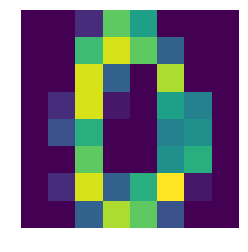

In [93]:
k = 130
im = X_digits[k].reshape(8, 8)
print(im)
plt.imshow(im)
plt.axis('off')
print('y_digits[{}] = {}'.format(k, y_digits[k]))

Apparently, row 130 of the matrix `X` (remember, indexed from zero, this is the 131st row from the top), when reshaped, yields the image above. The corresponding entry of the target vector `y` is $0$ which means that this image is intended to represent the numeral $0$. Whether this is obvious depends on the handwriting of the original author.

[Back to top](#Assignment-Contents)
<a id="q-digit-plot"></a>

---
#### Question 1

Your task is extract the 1674th row from the matrix `X_digits` and determine which numeral that image corresponds to.

+ Assign the row extracted to the identifier `ans_1_row`.
+ Assign the associated digit (as an integer) to `ans_1_digit`.
+ Remember, in extracting a row from `X_digits`, Python arrays use indexing from 0.

The 1674th row corresponds to this image of the digit 6.


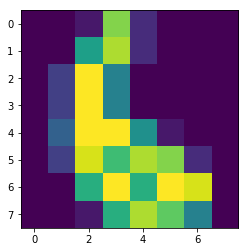

In [94]:
### GRADED
### Plot the image from 1674th row of the matrix X_digits.
### What numeral does this image represent? 
### Assign the row as ans_1_row and the associated digit (as an integer)
### to the identifier ans_1_digit.
## e.g., ans_1_digit = 9
### YOUR SOLUTION HERE:
ans_1_row = X_digits[1673]
ans_1_digit = y_digits[1673]
### For verifying answer:
image_digit = ans_1_row.reshape(8, 8)
print('The 1674th row corresponds to this image of the digit {}.'.format(ans_1_digit))
plt.imshow(image_digit);

In [95]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Examining the Target Classes

In classification problems, the labels (or targets) are *discrete* or *categorical* values (by contrast with regression problems). That being the case, it is generally preferable when the labelled data are *balanced*; that is, the labels are uniformly distributed in the training data from which models are built. For a binary classification problem (i.e., one with two classes), that means 50% of the data is from one class and 50% of the data from the other class. For a classification problem with $k$ classes, that would mean each class is represented in $(100 \div k)$% of the data.

Examining the target vector `y` for the MNIST Digits data, it appears that each numeral from the sequence $0$ through $9$ occurs in a random sequence:

In [96]:
y = digits.target
print(y[31:60])

[9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3]


---

[Back to top](#Assignment-Contents)
<a id="q-digit-counts"></a>

---
#### Question 2

Your task here is to summarize how often each digit from $0$ through $9$ occurs in the vector `y_digits`.

+ The result should be a Pandas Series with the integers $0$ though $9$ as the index (sorted in increasing order) and the corresponding counts as the data.
+ HINT: the Pandas Series method `value_counts` can do this easily, as can the Numpy function `numpy.unique`.
+ Assign the resulting Series to `ans_2`.

In [97]:
### GRADED
### Create a Pandas Series with a sorted index of the numerals 0 through 9. 
### The corresponding values are the counts of the occurrences of each digit
### in the vector y_digits from the MNIST digits dataset.
### Assign the result to the identifier ans_2.
### YOUR SOLUTION HERE:
#print(y_digits)
#print(np.unique(y_digits))
#print(pd.value_counts(y_digits,0))
ans_2 = pd.value_counts(y_digits,0)
print('Raw counts:\n===========\n{}\n'.format(ans_2))
print('Frequencies:\n============\n{}\n'.format(ans_2/len(ans_2)))

Raw counts:
0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
dtype: int64

Frequencies:
0    17.8
1    18.2
2    17.7
3    18.3
4    18.1
5    18.2
6    18.1
7    17.9
8    17.4
9    18.0
dtype: float64



In [98]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Before proceeding with logistic regression, you will modify the problem to yield a *binary classification problem*. That is, rather than classifying images of the digits 0 through 9, you'll modify the category labels to $+1$ for the digit $9$ and $-1$ for everything else (the choice of labels is arbitrary; they are $+1$ and $-1$ in this case, but they could be, e.g., $+1$ and $0$).

The preceding substitution yields a *two-class* or *binary classification problem* consistent with the discussion of logistic regression from the lectures. Of course, the problem will be quite unbalanced by virtue of the fact that only about 10% of the samples are images of the numeral $9$ and the remaining 90% correspond to other digits.

[Back to top](#Assignment-Contents)
<a id="q-binarize"></a>

---
#### Question 3

Your task here is to create a new array `ans_3_vec` in which $+1$ replaces $9$ in every occurrence in `y_digits`. All other entries (i.e., the digits $0$ through $8$) should be replaced by $-1$. This yields suitable targets for a binary classification problem.

+ You will also create a Pandas Series (with a sorted index) that records the counts of each class (similar to Question 2).
+ The result should be a Pandas Series with the integers $-1$ and $+1$ on the index (sorted in increasing order) and the corresponding counts as the data.
+ Assign the Series of counts to `ans_3_counts`.
+ HINT: the functions `numpy.where`, `numpy.unique`, and `pandas.Series.value_counts` may be useful for these tasks exactly as in earlier problems).

In [116]:
### GRADED
### Binarize the vector y_digits and count its various classes as described above.
### Save the results as ans_3_vec & ans_3_counts.
### YOUR SOLUTION HERE:
ans_3_vec = np.where(y_digits<9, -1, y_digits)
ans_3_vec = np.where(ans_3_vec>-1, 1, ans_3_vec)
#print(pd.DataFrame(y_digits))
#ans_3_vec = y_digits
ans_3_counts = pd.value_counts(ans_3_vec,0)
### Verification:
print('Last 10 entries of ans_3_vec: {}\n'.format(ans_3_vec[-10:]))
print('Raw counts:\n===========\n{}\n'.format(ans_3_counts))

Last 10 entries of ans_3_vec: [-1 -1 -1 -1 -1  1 -1 -1  1 -1]

Raw counts:
-1    1617
 1     180
dtype: int64



In [117]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [118]:
y_digits_bin = ans_3_vec # Preserve this answer for future computation

## Train/Test Split

As usual, it's useful to divide the data into *training* and *testing* sets. The easiest way to do so is using the function `train_test_split` from the Scikit-Learn submodule `sklearn.model_selection` (you can consult the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to learn how to customize the behavior of this function).

In [119]:
from sklearn.model_selection import train_test_split
X_digits_train, X_digits_test, y_digits_train, y_digits_test = \
         train_test_split(X_digits, y_digits_bin, random_state = 42)

[Back to top](#Assignment-Contents)
<a id="q-count-bin"></a>

---
#### Question 4

Your task here is to create a Pandas DataFrame with the categories $-1$ and $+1$ in ascending order as the index and with two columns: `train` and `test`.
+ The entries of each row, then, are the number of occurrences of each category in the training target `y_digits_train` and the testing target `y_digits_test` respectively.
+ Bind the DataFrame to the identifier `ans_4`.

In [127]:
### GRADED
### As in earlier questions, count the occurrences of each class,
### but this time in the training & the testing data sets 
### (i.e., in y_digits_train and y_digits_test).
### Assemble the results into a Pandas DataFrame with index
### values -1 & +1 (sorted in ascending order) and with two
### columns: train & test.
### That is, your final DataFrame should have these headings:
###        | train_counts | test_counts | 
### =======================================
### Digits | 
### Assign the DataFrame to the identifier ans_4.
print(y_digits_bin)
train_categories = pd.value_counts(y_digits_train)
test_categories = pd.value_counts(y_digits_test)
print(train_categories)
print(test_categories)
data = {'train':[train_categories[-1],train_categories[1]], 'test':[test_categories[-1],test_categories[1]]}
ans_4 = pd.DataFrame(data, index =[-1,1]) 
###
### YOUR CODE HERE
###
print('Counts of each category:\n'+ 24*'=')
display(ans_4)

[-1 -1 -1 ... -1  1 -1]
-1    1215
 1     132
dtype: int64
-1    402
 1     48
dtype: int64
Counts of each category:


,train,test
-1,1215,402
1,132,48


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [122]:
display(ans_4/ans_4.sum(axis=0)) # Display above solution as frequencies

,train_counts,test_counts
-1,0.902004,0.893333
1,0.097996,0.106667


### Using a Dummy Classifier

As a first classifier, you can apply the built-in [`DummyClassifier` class from `sklearn.dummy`](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) to set a baseline for performance of our future models.  This classifier does not actually use the feature matrix `X_digits_train`; classification decisions are made using the target vector `y_digits_train` only.  There are a few strategies, but we'll start with the `'most_frequent'` strategy.  That is, the `predict` method always returns the majority class. For our binary digit classification problem, this would be `-1` (because the `1` classification is reserved for `9`s and most of the digits are not `9`s).

In [123]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_digits_train, y_digits_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

Having applied the `fit` method to the training data, you can use the `predict` method to see how this estimator classifies the data. Unsurprisingly, it returns a vector of all `-1`s (because that is the majority class for this data).

In [124]:
y_digits_pred = dummy.predict(X_digits_test)
print(y_digits_pred)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

You can find the fraction of correct classifications using the method `score` with the test data:

In [125]:
score = dummy.score(X_digits_test, y_digits_test)
print('The fraction of correct classifications is: {:5.3f}'.format(score))

The fraction of correct classifications is: 0.893


Using `dummy.score` is equivalent to explicitly comparing the entries of `y_digits_pred` to `y_digits_test`, counting the number of correct classifications, and dividing by the number of classifications in total. 

In [128]:
# This is the long way of computing the accuracy score
correct_classifications = (y_digits_pred == y_digits_test)
score = correct_classifications.sum() / len(correct_classifications)
print('The fraction of correct classifications is: {:5.3f}'.format(score))

The fraction of correct classifications is: 0.893


For classification problems, a *confusion matrix* is a more detailed description of the accuracy of a classifier. It contains entries for the actual values as rows and predicted values as columns. This means we have:

| $~$ | **predicted  (-1)** | **predicted (+1)** |
| ---- | ----------- | ---------- |
| **actual (-1)** |  true negative | false positive |
| **actual (+1)** |  false negative | true positive |


The preceding definition generalizes to the multi-class classification problems as well.
In *Scikit-Learn*, the `confusion_matrix` function takes as arguments the actual labels followed by the predicted labels (labelled in ascending order according to the class labels). From the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html):

> `sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)`
>
> Compute confusion matrix to evaluate the accuracy of a classification
>
> By definition a confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ but predicted to be in group $j$.
>
> Thus in binary classification, the count of true negatives is $C_{0,0}$, false negatives is $C_{1,0}$, true positives is $C_{1,1}$, and false positives is $C_{0,1}$.

[Back to top](#Assignment-Contents)
<a id="q-dummy-conf"></a>

---
#### Question 5

Your task here is to generate the confusion matrix associated with the `DummyClassifier` just created and the test data for this digits binary classification problem (i.e., computing which images correspond to the digit `9` and which do not).
+ The confusion matrix should be constructed as described above (i.e., consistent with the `sklearn` function `confusion_matrix`).
+ You can construct the confusion matrix explicitly or you can use the function `confusion_matrix` from `sklearn.metrics` according to your preference.
+ Save the 2D Numpy array for the confusion matrix to `ans_5`.

In [130]:
### GRADED
### Use the DummyClassifier dummy (that was fit to the training data
### (X_digits_train, y_digits_train) just above) to compute a confusion
### matrix (as described above).
### That is, use the prediction y_digits_pred generated above
### & the test labels y_digits_test to build the corresponding confusion
### matrix.
### Assign the resulting 2D Numpy array to the identifier ans_5.
### YOUR SOLUTION HERE:
from sklearn.metrics import confusion_matrix
ans_5 = confusion_matrix(y_digits_test, y_digits_pred, labels = None, sample_weight = None)
### For verifying answer:
print('Confusion_matrix:\n\n{}'.format(ans_5))

Confusion_matrix:

[[402   0]
 [ 48   0]]


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Computing the Accuracy of a Binary Classifier

The most basic way to assess performance is to compare the total number of correct predictions and the total number of observations.  This is the **accuracy**. Using the diagram of our confusion matrix above, the accuracy can be written as

$$\text{accuracy} = \frac{\mathtt{tp} + \mathtt{tn}}{\mathtt{tn} + \mathtt{tp} + \mathtt{fn} + \mathtt{fp}}$$

where $\mathtt{tn}$, $\mathtt{tp}$, $\mathtt{fn}$, and $\mathtt{fp}$ are the number of true negatives, true positives, false negatives, and false positives respectively.

[Back to top](#Assignment-Contents)
<a id="q-accuracy"></a>

---
#### Question 6

Your task here is to compose a function `accuracy_score` that implements the preceding formula. The input to the function is a (previously computed) confusion matrix and the output is an accuracy score.

In [136]:
### GRADED
### Complete the function accuracy_score below:
###
###
print(ans_5[0,0])
def accuracy_score(confusion_matrix):
    '''
    Computes accuracy (ratio of total number of correct predictions
    to total number of observations) from a confusion matrix
    Input:
    confusion_matrix: 2 by 2 numpy array
    (from a binary classification problem)
    '''
    return (confusion_matrix[0][0]+confusion_matrix[1][1]) / (confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
###
### Insert your solution here:
###

print(accuracy_score(ans_5))

402
0.8933333333333333


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Using Linear Regression for Classification

The `DummyClassifier` developed above gets about 90% accuracy without doing anything (simply because the training data is so unbalanced; this is a common scenario in binary classification problems). So any other classifier developed should at beat this.

As seen in the lecture videos, you can try using a `LinearRegression` estimator and threshold the results to determine categories. The code below constructs the regression estimator, fits it to the training data, and makes a prediction based on the testing data.

In [137]:
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(X_digits_train, y_digits_train)
y_digits_pred = model_lin.predict(X_digits_test)

The predictions in `y_digits_pred` are real numbers. For this binary classification problem, you need to *threshold* the values somehow to convert the labels to the categories $+1$ and $-1$. The threshold $t$ determines which category the predicted targets map to, i.e.,
$$ y_k \leftarrow \text{threshold}(y_k, t) = \begin{cases} +1, & y_{k}\ge t \\ -1, & y_k<t \end{cases}. $$
The choice of threshold $t=0$ is consistent with the *sign* function (although any values between $-1$ and $+1$ would also be reasonable thresholds). The accuracy of the resulting classifier varies as the threshold changes (depending on the imbalance in the training data).

[Back to top](#Assignment-Contents)
<a id="q-linear"></a>

---
#### Question 7

You can now use the linear regression model just fit as a binary classifier.

+ Apply a threshold of $t=0.0$ to the regression model's predictions `y_digits_pred` to yield a vector with $+1$ and $-1$ as entries; assign the vector to the identifier `ans_7a`.
+ Use the thresholded binary vector `ans_7a` to compute a confusion matrix as in Question 5. Assign the $2\times2$ confusion matrix to `ans_7b`.
+ Use the confusion matrix just computed to compute the accuracy score (using your function from Question 6) for this classifier. Assign the accuracy computed to `ans_7c`.

In [141]:
### GRADED
### Threshold the entries of y_digits_pred with the value t=0 to yield ans_7a.
### Compute the corresponding confusion matrix & accuracy scores in ans_7b &
###   ans_7c respectively.
### YOUR SOLUTION HERE:
#print(y_digits_pred)
ans_7a = np.where(y_digits_pred<0, -1, y_digits_pred)
ans_7a = np.where(ans_7a>=0, 1, ans_7a)
ans_7b = confusion_matrix(y_digits_test, ans_7a, labels = None, sample_weight = None)
ans_7c = accuracy_score(ans_7b)
### For verifying answer:
print('Using Linear Regression with a threshold t=0.0:')
print('Confusion_matrix:\n\n{}\n'.format(ans_7b))
print('Accuracy score: {:5.3f}'.format(ans_7c))

Using Linear Regression with a threshold t=0.0:
Confusion_matrix:

[[398   4]
 [ 13  35]]

Accuracy score: 0.962


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Assignment-Contents)
<a id="q-linear2"></a>

---
#### Question 8

This question is the same as Question 7, but using a different threshold $t=-0.1$

+ Apply a threshold of $t=-0.1$ to the regression model's predictions `y_digits_pred` to yield a vector with $+1$ and $-1$ as entries; assign the vector to the identifier `ans_8a`.
+ Use the thresholded binary vector `ans_8a` to compute a confusion matrix as in Question 5. Assign the $2\times2$ confusion matrix to `ans_8b`.
+ Use the confusion matrix just computed to compute the accuracy score (using your function from Question 6) for this classifier. Assign the accuracy computed to `ans_8c`.

In [144]:
### GRADED
### Threshold the entries of y_digits_pred with the value t=-0.1 to yield ans_8a.
### Compute the corresponding confusion matrix & accuracy scores in ans_8b &
###   ans_8c respectively.
### YOUR SOLUTION HERE:
ans_8a = np.where(y_digits_pred<-0.1, -1, y_digits_pred)
ans_8a = np.where(ans_8a>=-0.1, 1, ans_8a)
ans_8b = confusion_matrix(y_digits_test, ans_8a, labels = None, sample_weight = None)
ans_8c = accuracy_score(ans_8b)


### For verifying answer:
print('Using Linear Regression with a threshold t=-0.1:')
print('Confusion_matrix:\n\n{}\n'.format(ans_8b))
print('Accuracy score: {:5.3f}'.format(ans_8c))

Using Linear Regression with a threshold t=-0.1:
Confusion_matrix:

[[397   5]
 [  9  39]]

Accuracy score: 0.969


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Using Logistic Regression for Classification

The `LinearRegression` classifier developed above gets about 96-97% accuracy depending on how the threshold is applied. Can Logistic Regression do better?

[Back to top](#Assignment-Contents)
<a id="q-logreg"></a>

---
#### Question 9

Your task here is to instantiate and use a `LogisticRegression` estimator from `sklearn.linear_model` to work on the above binary classification problem.

+ Instantiate a `LogisticRegression` estimator; assign the vector to the identifier `ans_9a`. Use the default constructor, i.e., don't worry about assigning other keyword arguments.
+ Fit the instantiated `ans_9a` to the data `X_digits_train`.
+ Use the estimator object `ans_9a` to predict the labels given the inputs in `X_digits_test`. Assign the result to `ans_9b`.
+ Compute a confusion matrix and an accuracy score as in the preceding two questions. Assign the corresponding $2\times2$ confusion matrix to `ans_9c` and the accuracy score to `ans_9d`.

In [145]:
### GRADED
### Fit a LogisticRegression model, use it to predict labels from the test data
###   & compute the corresponding confusion matrix and accuracy.
### Use the identifiers ans_9a, ans_9b, ans_9c, & ans_9d for the LogisticRegression
### object, the predicted labels, the confusion matrix, & the accuracy respectively.
### YOUR SOLUTION HERE:
from sklearn.linear_model import LogisticRegression
ans_9a = LogisticRegression()
ans_9a.fit(X_digits_train, y_digits_train)
ans_9b = ans_9a.predict(X_digits_test)
ans_9c = confusion_matrix(y_digits_test, ans_9b, labels = None, sample_weight = None)
ans_9d = accuracy_score(ans_9c)
### For verifying answer:
print('Using Logistic Regression (default hyperparameters):')
print('Confusion_matrix:\n\n{}\n'.format(ans_9c))
print('Accuracy score: {:5.3f}'.format(ans_9d))

Using Logistic Regression (default hyperparameters):
Confusion_matrix:

[[397   5]
 [  6  42]]

Accuracy score: 0.976


In [146]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


You can bind the answers from Question 9 to more descriptive identifiers for the next question.

In [149]:
model_logreg = ans_9a
y_logreg_pred = ans_9b

The `LogisticRegression` model just developed in `model_logreg` has a `coef_` attribute similar to that of the `LinearRegression` estimator. If you extract it, you can visualize the coefficients as an image:

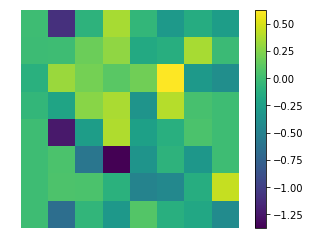

In [152]:
coefs = model_logreg.coef_.reshape(8,8)
plt.imshow(coefs)
plt.colorbar()
plt.axis('off');

The image above shows which pixels (features) in our model have the strongest effect in distinguishing the digit $9$ from the other digits. This can be useful in characterizing which features are most strongly correlated with producing accurate predictions.

[Back to top](#Assignment-Contents)
<a id="q-proba"></a>

---
#### Question 10

Your task here is to use the `predict_proba` method of the object `model_logreg` to produce an array of probabilities associated with class labels for a few samples of the testing data.

+ Given the subset `samples` of 5 rows from `X_digits_test`, apply `predict_proba` to determine the probabilities of assignment to each class.
+ Assign the output returned from `predict_proba` to `ans_10a`.
+ Use the 2D array of probabilities to determine the class labels associated with the rows from `samples`. Since the values in `ans_10a` are probabilities between 0 and 1, use the threshold of $0.5$ to determine whether to classify in class $+1$ or $-1$.
+ Assign the resulting array of class labels to `ans_10b` (it should be a vector of length 5 with entries $+1$ or $-1$).

In [162]:
### GRADED
### Use predict_proba to determine an array of probabilities for the class labels
###   for the array samples (samples is provided below). Save as ans_10a.
### Use the result from ans_10a to compute the associated class labels with samples.
###   Save as ans_10b.
###
samples = X_digits_test[50:55,:]
### YOUR SOLUTION HERE:
ans_10a = model_logreg.predict_proba(samples)
ans_10b = [0,0,0,0,0]
for i in range(5):
    if(ans_10a[i,0] >= 0.5):
        ans_10b[i] =-1
    else:
        ans_10b[i] =1
#ans_10b = np.array([-1, -1,  1, -1, -1])
ans_10b = np.array(ans_10b)
### For verifying answer:
print('Results of predict_proba:\n{}\n'.format(ans_10a))
print('Resulting class labels:\n{}'.format(ans_10b.reshape(-1,1)))

Results of predict_proba:
[[9.99925985e-01 7.40148795e-05]
 [1.00000000e+00 3.19675750e-13]
 [7.50974653e-03 9.92490253e-01]
 [9.99997542e-01 2.45802029e-06]
 [9.99999999e-01 1.20139774e-09]]

Resulting class labels:
[[-1]
 [-1]
 [ 1]
 [-1]
 [-1]]


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Assignment-Contents)
<a id="q-logit"></a>

#### Question 11

Your penultimate task is to define a function `logit` to compute the *log-odds* (i.e., the logarithm of the odds) associated with a given probability $p$
+ Provide your function definition in the cell below associated with the identifier `logit`.
+ Recall the *logit* function can be defined mathematically as
$$ \text{logit}(p) = \begin{cases}
-\infty, & p=0, \\
\log \left(\frac{p}{1-p}\right), & 0<p<1,\\
+\infty, & p=1
\end{cases}.$$
+ Have your function return `-np.inf` or `np.inf` when `p` is `0` or `1` respectively.
+ Have your function return `np.nan` if $p<0$ or $p>1$.
+ Be sure to use the *natural* logarithm (i.e., base $e$); this is implemented in Numpy with `numpy.log` (usually aliased as `np.log`).
+ Be sure that the function is *vectorized*, i.e., that it can accept a Numpy array, a Pandas Series, or a Pandas DataFrame as input and still return the corresponding result with `logit` applied element-wise. HINT: the function `np.where` is very useful for this.

In [175]:
### GRADED
###
### Complete the body of the function logit with the signature provided.
### Be sure it agrees with the specifics described above.
###
### YOUR SOLUTION HERE:
def logit(p):
    '''Computes logit function, i.e., log-odds from probability
    INPUT:
    p - probability (value expected to be stictly between 0 & 1)
    '''
    return_arr = np.ndarray(shape=[len(p),])
    for i in range(len(p)):
        if(p[i]>1.0 or p[i]<0.0):
            return_arr[i] = np.nan
        elif(p[i]==1.0):
            return_arr[i] = np.inf
        elif(p[i]==0.0):
            return_arr[i] = -np.inf
        else:
            return_arr[i] = np.log(p[i]/(1-p[i]))
            
    return return_arr
            
    
### For verifying answer:
p = np.array([0, 0.1, 0.2, 0.8, 0.9, 1, 5])
print('logit(p) = \n{}'.format(logit(p))) # Notice symmetry in values

logit(p) = 
[       -inf -2.19722458 -1.38629436  1.38629436  2.19722458         inf
         nan]


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Assignment-Contents)
<a id="q-logistic"></a>

---

#### Question 12

Your final task is to define a function `logistic` that implements the *logistic* function. Recall this function can be defined mathematically by the formula
$\displaystyle{\text{logistic}(x) = \frac{1}{1+e^{-x}}}$. This formula is algebraically equivalent to the formula $\displaystyle{1 - \frac{1}{1+e^{x}}}$. However, the former formula avoids overflow for large *positive* values of $x$ while the latter does the same for large *negative* values of $x$. That is, for large values, a piecewise-defined function along the lines of
$$
\text{logistic}(x) = \begin{cases}
\displaystyle{\frac{1}{1+e^{-x}}}, & x \ge 0 \\
\displaystyle{1 - \frac{1}{1+e^{x}}}, & \text{otherwise}
\end{cases}
$$
is more robust for evaluating the logistic function for large (positive or negative) input values.

+ Provide your function definition in the cell below associated with the identifier `logistic`.
+ Use the piecewise strategy mentioned above to compute `logistic` which is more robust for large values. HINT: The function `np.where` is very useful for this.
+ Have your function return `0` and `1` when the input is `-np.inf` and `+np.inf` respectively.
+ Remember that $e^{x}$ is computed in Numpy by `np.exp(x)`. This is usually a more accurate way to evaluate the exponential function (i.e., avoid `np.e**x`).
+ Be sure that the function is *vectorized*, i.e., that it can accept a Numpy array, a Pandas Series, or a Pandas DataFrame as input and still return the corresponding result with `logistic` applied element-wise.

In [185]:
### GRADED
###
### Complete the body of the function logistic with the signature provided.
### Be sure it agrees with the specifics described above.
###
### YOUR SOLUTION HERE:
def logistic(x):
    '''Computes logistic function, i.e., probability from log-odds
    INPUT:
    x : log-odds (arbitrary real values)
    '''
    return_arr = np.ndarray(shape=[len(x),])
    for i in range(len(x)):
        #print(x[i],np.isinf(x[i]))
        if(np.isinf(x[i])):
            if(x[i]>0):
                return_arr[i] = 1.0
            else:
                return_arr[i] = 0.0
        elif(x[i]>=0.0):
            return_arr[i] = 1/(1+np.exp(-x[i]))
        else:
            return_arr[i] = 1-(1/(1+np.exp(x[i])))
            
    return return_arr

### For verifying answer:
x = np.array([-np.inf,-2.19722458,-1.38629436,1.38629436,2.19722458,np.inf])
print('logistic(x) = {}'.format(logistic(x)))

logistic(x) = [0.  0.1 0.2 0.8 0.9 1. ]


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Assignment-Contents)